**Automated Resume Scanning App**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/content/sample_data/ResumeDataSet.csv')

In [34]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [35]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [36]:
df.shape

(962, 2)

In [37]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


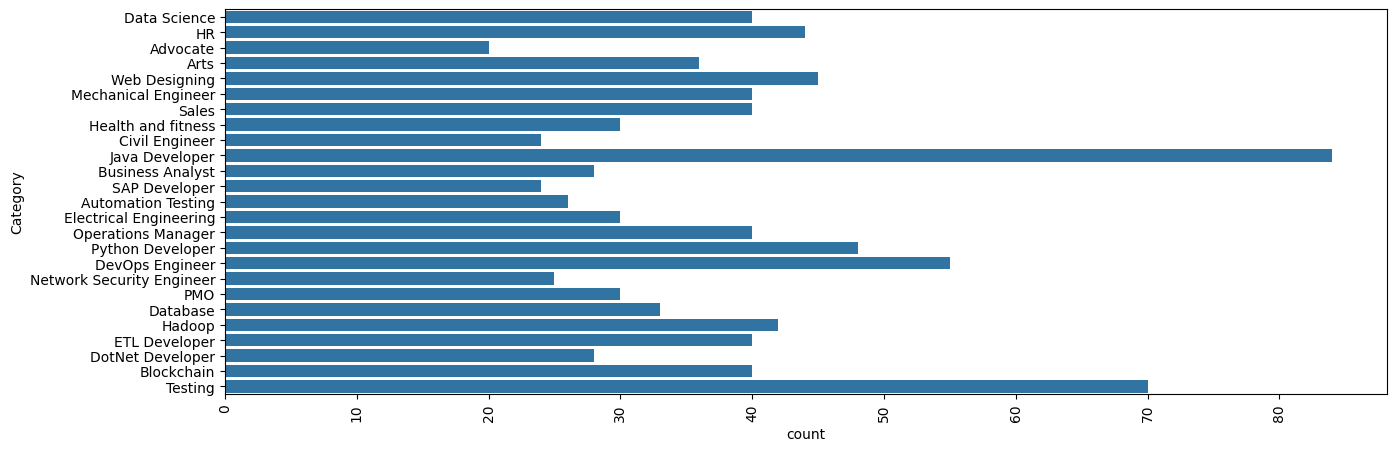

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [39]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

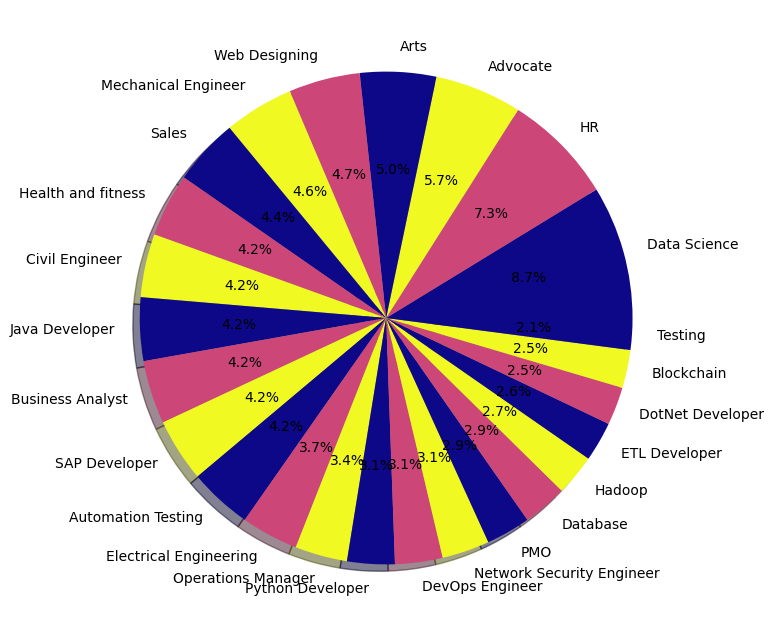

In [40]:
counts = df['Category'].value_counts()
lables = df['Category'].unique()
plt.figure(figsize=(15,8))
plt.pie(counts, labels=lables,autopct='%1.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [41]:
df['Category'][10]

'Data Science'

In [42]:
df['Resume'][10]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data


In [43]:
import re

In [44]:
def clean_resume(text):
  CleanText = re.sub('http\S+\s',' ',text)
  CleanText = re.sub('RT|cc',' ',CleanText)
  CleanText = re.sub('#\S+\s',' ',CleanText)
  CleanText = re.sub('@\S+',' ',CleanText)
  CleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',CleanText)
  CleanText = re.sub(r'[^\x00-\x7f]',' ',CleanText)
  CleanText = re.sub('\s+',' ',CleanText)
  return CleanText

In [45]:
clean_resume('My name is Aniket and this is my link http://google.com  and access it by @gmail.com')

'My name is Aniket and this is my link and a ess it by '

In [46]:
df['Resume']

,Resume
0,Skills * Programming Languages: Python (pandas...
1,Education Details \r\nMay 2013 to May 2017 B.E...
2,"Areas of Interest Deep Learning, Control Syste..."
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...
957,Computer Skills: â¢ Proficient in MS office (...
958,â Willingness to accept the challenges. â ...
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [47]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [48]:
df['Resume'][10]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [51]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [52]:
# 'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'

# Vectorization

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext = tfidf.transform(df['Resume'])

In [54]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [55]:
requiredtext

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

# Splitting

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(requiredtext,df['Category'],test_size=0.2,random_state=42)

In [57]:
x_train.shape

(769, 7351)

In [58]:
x_test.shape

(193, 7351)

## Traning model and classification report

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


## Prediction System

In [ ]:
import pickle
pickle.dump(tfidf,open('C:\Users\Aniket\OneDrive\Desktop\data Engine\NLP\tfidf.pkl','wb'))
pickle.dump(clf,open('C:\Users\Aniket\OneDrive\Desktop\data Engine\NLP\clf.pkl','wb'))

In [61]:
my_resume ='''
  I am data scientist specializing in machine learning, deep learning, and computer vision. With a strong background in mathematics and
  statistics, I have a deep understanding of data. I am passionate about uncovering hidden patterns and insights in data. I have extensive
  experience in developing predictive modles, implementing algorithms, and designing computer vision systems. My technical skills include
  profeciency in python, sklearn, Tenserflow and pyTorch. What sets me appart is my ability to effectively communicate complex ideas
  in a clear and concise manner. I excel in translating technical insights into actional and actionable recommendations.
  '''

In [ ]:
import pickle

# Load the trained classifier and the TfidfVectorizer
clf = pickle.load(open('C:\Users\Aniket\OneDrive\Desktop\data Engine\NLP\clf.pkl', 'rb'))
tfidf = pickle.load(open('C:\Users\Aniket\OneDrive\Desktop\data Engine\NLP\tfidf.pkl', 'rb'))

# Clean the input Resume
cleaned_resume = clean_resume(my_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make predictions using the trained classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer", 
    5: "Civil Engineer",
    0: "Advocate",
}
category_name = category_mapping.get(prediction_id, "Unknown")
st.write("Predicted Category:", category_name)

Predicted Category: Unknown
